In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.dsn_util import get_system_from_template, get_arch_from_template
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf
import os
os.chdir('../../')

In [20]:
### EPS = 1e-16

# multivariate normal initialization variance
num_masks = 4
nlayers = 2
freq = "med"

sigma_init = 0.5
c_init_order = 2
lr_order = -3
start_rs = 1
num_rs = 5
random_seeds = np.arange(start_rs, num_rs+start_rs)


0 ------------------
thresh 0.005
0 pvals [0.0, 0.0, 0.0, 0.09, 0.0, 0.0, 0.0, 0.0, 0.27, 0.0]
1 pvals [0.0, 0.0, 0.0, 0.21, 0.0, 0.0, 0.0, 0.0, 0.47, 0.0]
2 pvals [0.38, 0.0, 0.0, 0.77, 0.0, 0.01, 0.03, 0.05, 0.8, 0.05]
3 pvals [0.0, 0.08, 0.33, 0.03, 0.68, 0.13, 0.37, 0.74, 0.78, 0.47]
4 pvals [0.03, 0.6, 0.21, 0.67, 0.23, 0.03, 0.12, 0.25, 0.33, 0.14]


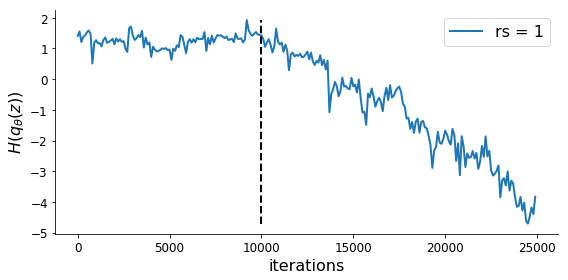

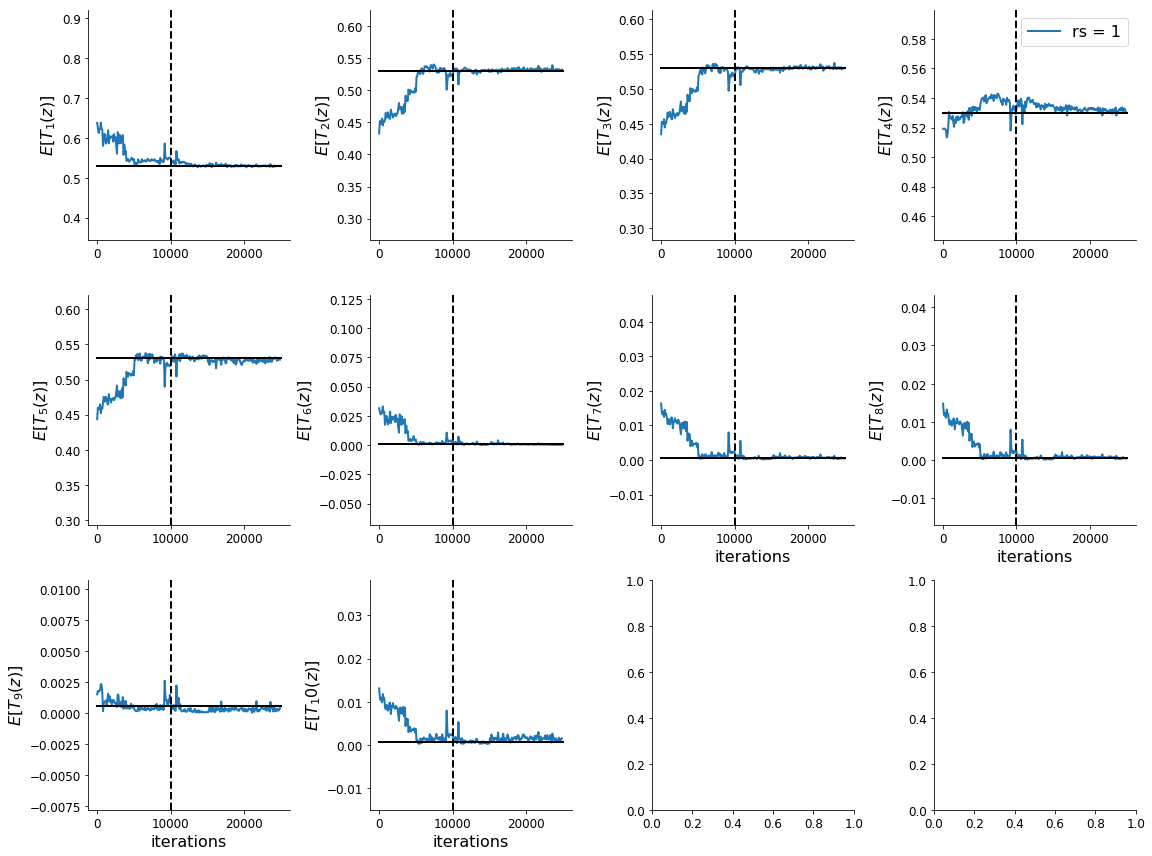

[4]


In [36]:
sysname = "STGCircuit"
param_dict = {"freq":freq}
system = get_system_from_template(sysname, param_dict)

# Get DSN architecture
arch_params = {
               'D':system.D,
               'repeats':1,
               'num_masks':num_masks,
               'nlayers':nlayers,
               'sigma_init':sigma_init,
              }
param_dict.update(arch_params)
arch_dict = get_arch_from_template(system, param_dict)

dirstr = '11_13_19'

model_dirs = []
legendstrs = []
max_inds = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = get_savedir(system, arch_dict, c_init_order, random_seed, dirstr)
    model_dirs.append(dsndir)
    legendstrs.append('rs = %d' % random_seed)
    
alpha = 0.05
frac_samps = 0.1

figs, ME_its = plot_opt(model_dirs, legendstrs, con_method='mix', \
                        alpha=alpha, frac_samps=frac_samps, maxconlim=0.6)
print(ME_its)


In [34]:
#ME_its = num_rs*[7]
ME_its = num_rs*[4]

ticks None
0
dist (300, 2)
not saving figure


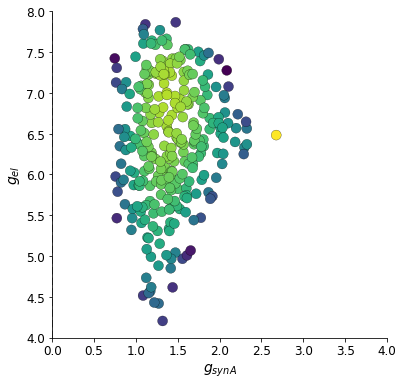

In [35]:
Zs, cs, axs = dsn_pairplots(model_dirs, 'Zs', system, ME_its, figsize=(6,6),
                   xlims=[0, 4], ylims=[4, 8])

ticks None
0
 has not converged so not plotting.
1
dist (300, 10)
not saving figure
2
 has not converged so not plotting.
3
 has not converged so not plotting.
4
 has not converged so not plotting.


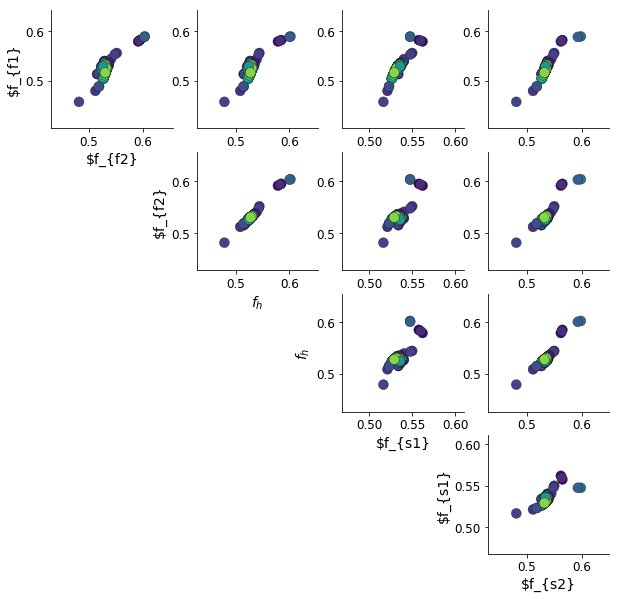

In [6]:
Zs, cs, axs = dsn_pairplots(model_dirs, 'T_xs', system, ME_its, D=5)

In [13]:
npzfile = np.load(model_dirs[0] + 'opt_info.npz')
T_xs = npzfile['T_xs']
print(T_xs.shape)
print(ME_its[0])

(11, 300, 10)
4


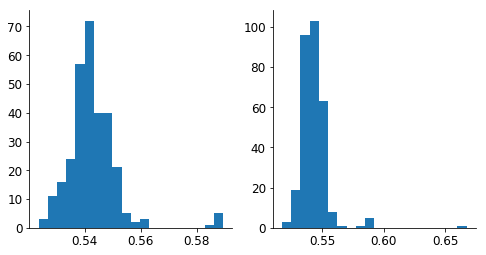

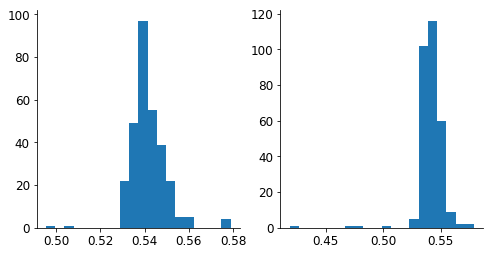

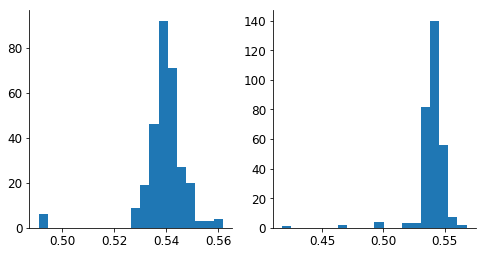

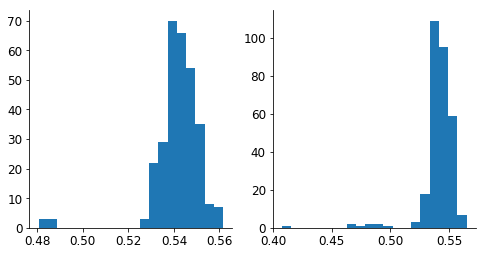

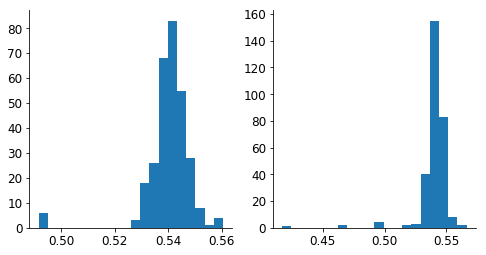

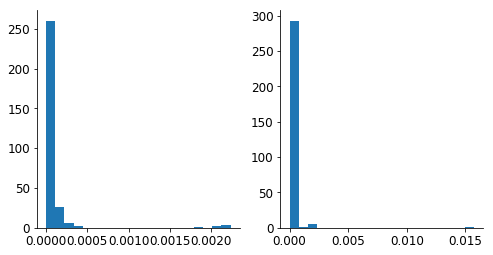

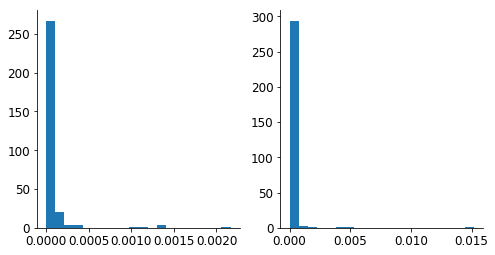

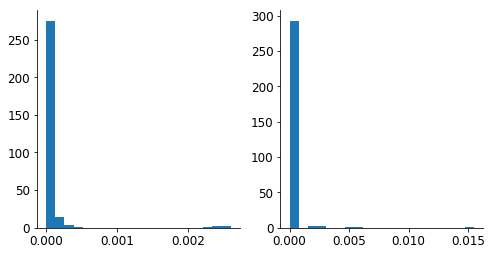

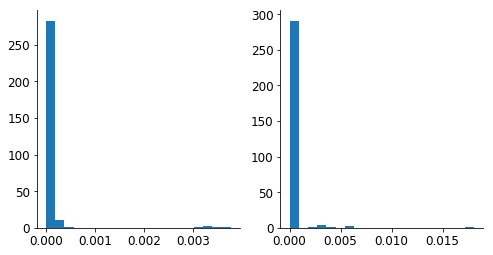

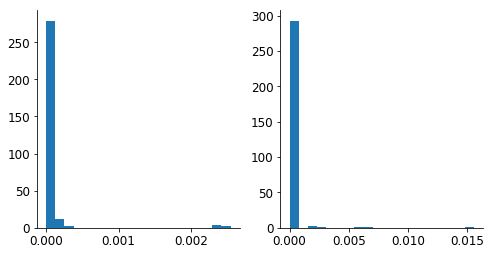

In [18]:
ME_it = ME_its[0]
T_x = T_xs[ME_it]
for i in range(T_x.shape[1]):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    axs[0].hist(T_xs[0,:,i], bins=20)
    axs[1].hist(T_xs[ME_it,:,i], bins=20)
    plt.show()